In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

# **Importing and cleaning data**

## 1. NOx emissions

In [2]:
NOx_11='/home/vasilis/Documents/Dublin/Enviroment/dublin-city-council-no--no2-2011.csv'
df_NOx_11=pd.read_csv(NOx_11)
df_NOx_11=df_NOx_11.drop(df_NOx_11.columns[[2,3,4,5,6,7,11,13,17,19,20,21]] ,axis=1)

In [3]:
df_NOx_11.replace('[a-zA-Z]',np.nan,inplace=True, regex=True)

In [4]:
df_NOx_11.T.isnull().any().sum()

3639

### _1.1 Conversion of values into "Νumeric" format_

In [5]:
df_NOx_11["Time"].replace(to_replace="24:00",value="0:00",inplace=True)

In [6]:
col0=pd.to_datetime(df_NOx_11["Date"])
col1=pd.to_datetime(df_NOx_11["Time"]).dt.hour
col2=pd.to_numeric(df_NOx_11['NO2 ug/m3.1'], errors='coerce')
col3=pd.to_numeric(df_NOx_11['NO ug/m3.1'], errors='coerce')
col4=pd.to_numeric(df_NOx_11['NOx ug/m3.1'], errors='coerce')

col6=pd.to_numeric(df_NOx_11['NO2 ug/m3.2'], errors='coerce')
col7=pd.to_numeric(df_NOx_11['NO ug/m3.2'], errors='coerce')
col8=pd.to_numeric(df_NOx_11['NOx ug/m3.2'], errors='coerce')

d1={"Date":col0,"Time":col1,"NO2 ug/m3.1":col2,'NO ug/m3.1':col3,'NOx ug/m3.1':col4,
   'NO2 ug/m3.2':col6,'NO ug/m3.2':col7,'NOx ug/m3.2':col8}
df_NOx_11=pd.DataFrame(d1)

In [7]:
df_NOx_11.head()

,Date,NO ug/m3.1,NO ug/m3.2,NO2 ug/m3.1,NO2 ug/m3.2,NOx ug/m3.1,NOx ug/m3.2,Time
0,2011-01-01,5.3,37.5,23.7,48.9,28.9,86.5,1.0
1,2011-01-01,6.5,17.8,24.0,44.1,30.5,61.9,2.0
2,2011-01-01,12.8,5.9,26.8,35.0,39.6,41.0,3.0
3,2011-01-01,12.8,10.7,27.0,38.3,39.9,49.0,4.0
4,2011-01-01,5.4,8.4,19.3,35.5,24.7,43.9,5.0


In [8]:
print("NaN values=",df_NOx_11.T.isnull().any().sum())

NaN values= 3639


In [9]:
df_NOx_11["NO ug/m3_avg"]=df_NOx_11[["NO ug/m3.1","NO ug/m3.2"]].mean(axis=1)
df_NOx_11["NO2 ug/m3_avg"]=df_NOx_11[["NO2 ug/m3.1","NO2 ug/m3.2"]].mean(axis=1)
df_NOx_11["NOx ug/m3_avg"]=df_NOx_11[["NOx ug/m3.1","NOx ug/m3.2"]].mean(axis=1)

In [10]:
NO_1=df_NOx_11.pop("NO ug/m3.1")
NO_2=df_NOx_11.pop("NO ug/m3.2")
NO2_1=df_NOx_11.pop("NO2 ug/m3.1")
NO2_2=df_NOx_11.pop("NO2 ug/m3.2")
NOx_1=df_NOx_11.pop("NOx ug/m3.1")
NOx_2=df_NOx_11.pop("NOx ug/m3.2")

In [11]:
df_NOx_11.dropna(axis=0, how='any',inplace=True)

## 2. CO emissions

In [12]:
CO_11='/home/vasilis/Documents/Dublin/Enviroment/dublin-city-council-co-2011.csv'
df_CO_11=pd.read_csv(CO_11)
df_CO_11=df_CO_11.drop(df_CO_11.columns[[5,9]] ,axis=1)

### _2.1 Conversion of values into "Νumeric" format_

In [13]:
col0=pd.to_datetime(df_NOx_11["Date"])
col1=df_CO_11['Time']
col2=pd.to_numeric(df_CO_11['CO mg/m3'], errors='coerce')
col3=pd.to_numeric(df_CO_11['8 hr roling avg'], errors='coerce')

col5=pd.to_numeric(df_CO_11['CO mg/m3.1'], errors='coerce')
col6=pd.to_numeric(df_CO_11['8 hr roling avg.1'], errors='coerce')

d2={"Date":col0,"Time":col1,"CO mg/m3":col2,'8 hr roling avg':col3,
   'CO mg/m3.1':col5,'8 hr roling avg.1':col6}
df_CO_11=pd.DataFrame(d2)

In [14]:
df_CO_11.head()

,8 hr roling avg,8 hr roling avg.1,CO mg/m3,CO mg/m3.1,Date,Time
0,0.1,0.5,0.2,0.5,2011-01-01,1.0
1,0.1,0.5,0.1,0.6,2011-01-01,2.0
2,0.1,0.6,0.1,0.6,2011-01-01,3.0
3,0.1,0.5,0.1,0.5,2011-01-01,4.0
4,0.1,0.5,0.1,0.4,2011-01-01,5.0


In [15]:
print("NaN values=",df_CO_11.T.isnull().any().sum())

NaN values= 510


In [16]:
df_CO_11["CO mg/m3_avg"]=df_CO_11[["CO mg/m3","CO mg/m3.1"]].mean(axis=1)

In [17]:
CO_1=df_CO_11.pop("CO mg/m3.1")
CO_2=df_CO_11.pop("CO mg/m3")
CO_8_hr_avg_1=df_CO_11.pop("8 hr roling avg.1")
CO_8_hr_avg_2=df_CO_11.pop("8 hr roling avg")

In [18]:
df_CO_11.dropna(axis=0, how='any',inplace=True)


## 3. SO2 emissions

In [19]:
SO2_11='/home/vasilis/Documents/Dublin/Enviroment/dublin-city-council-so2-2011.csv'
df_SO2_11=pd.read_csv(SO2_11)
df_SO2_11.drop(df_SO2_11.columns[[3,5,7,9,10,11,12,13]] ,axis=1,inplace=True)
df_SO2_11.drop([0],inplace=True)

### _3.1 Conversion of values into "Νumeric" format_

In [20]:
col0=pd.to_datetime(df_SO2_11["Date"],errors='coerce')
col1=df_SO2_11['Time']
col2=pd.to_numeric(df_SO2_11['SO2 ug/m3'], errors='coerce')

col4=pd.to_numeric(df_SO2_11['SO2 ug/m3.1'], errors='coerce')

d4={"Date":col0,"Time":col1,"SO2 ug/m3":col2,'SO2 ug/m3.1':col4}
df_SO2_11=pd.DataFrame(d4)

In [21]:
df_SO2_11.head()

,Date,SO2 ug/m3,SO2 ug/m3.1,Time
1,2011-01-01,2.2,0.2,1.0
2,2011-01-01,2.0,0.0,2.0
3,2011-01-01,1.7,0.1,3.0
4,2011-01-01,1.7,0.0,4.0
5,2011-01-01,1.5,0.0,5.0


In [22]:
print("Nan values=",df_SO2_11.T.isnull().any().sum())

Nan values= 1237


In [23]:
df_SO2_11["SO2 mg/m3_avg"]=df_SO2_11[["SO2 ug/m3","SO2 ug/m3.1"]].mean(axis=1)


In [24]:
SO2_1=df_SO2_11.pop("SO2 ug/m3.1")
SO2_2=df_SO2_11.pop("SO2 ug/m3")

In [25]:
df_SO2_11.shape

(8780, 3)

In [26]:
df_NOx_11.shape

(8757, 5)

In [27]:
df_CO_11.shape

(8756, 3)

In [28]:
Emission1=df_NOx_11.merge(df_CO_11,on=["Date",'Time'],how="inner")

In [29]:
Emission1.shape

(8756, 6)

In [30]:
emission=Emission1.merge(df_SO2_11,on=["Date",'Time'],how="inner")

In [31]:
emission.tail(5)

,Date,Time,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg
8750,2011-12-31,19.0,6.90,15.95,22.85,0.1,-0.25
8751,2011-12-31,20.0,6.45,17.15,23.70,0.1,-0.40
8752,2011-12-31,21.0,6.15,13.90,20.05,0.1,-0.30
8753,2011-12-31,22.0,4.60,12.55,17.10,0.1,-0.20
8754,2011-12-31,23.0,4.40,10.15,14.55,0.1,-0.30


## 5. Meteorological data Pheonix park

In [32]:
meteo_park='/home/vasilis/Documents/Dublin/Meteo/Phoenix_Park.csv'
df_meteo_park=pd.read_csv(meteo_park,low_memory=False,parse_dates=["date"])

In [33]:
df_meteo_park.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,2007-06-01 00:00:00,-1,,0,7.8,0,7.4,7.1,10.1,95,1011.4
1,2007-06-01 01:00:00,0,0.0,0,7.3,0,7.1,6.8,9.9,96,1011.9
2,2007-06-01 02:00:00,0,0.0,0,6.6,0,6.4,6.1,9.4,97,1012.4
3,2007-06-01 03:00:00,0,0.0,0,6.3,0,6.1,5.9,9.3,97,1013.0
4,2007-06-01 04:00:00,0,0.0,0,6.1,0,6.0,5.8,9.2,98,1013.2


### _5.1 Conversion of values into "Νumeric" format_

In [34]:
col1=df_meteo_park["date"].dt.hour

col0=pd.to_datetime(df_meteo_park["date"].dt.strftime('%m/%d/%Y'))

col3=pd.to_numeric(df_meteo_park['rain'], errors='coerce')

col5=pd.to_numeric(df_meteo_park['temp'], errors='coerce')



col10=pd.to_numeric(df_meteo_park['rhum'], errors='coerce')/100
col11=pd.to_numeric(df_meteo_park['msl'], errors='coerce')


d5={"Date":col0,'Time':col1,"rain":col3,'temp':col5,
   'rhum':col10,'msl':col11}
df_meteo_park=pd.DataFrame(d5)

In [35]:
df_meteo_park.sample(5)

,Date,Time,msl,rain,rhum,temp
51636,2013-07-05,12,1029.1,0.0,0.61,18.6
40038,2012-03-09,6,1028.3,0.0,0.82,10.0
27302,2010-09-25,14,1022.3,0.0,0.61,11.2
30744,2011-02-16,0,983.6,0.0,0.85,5.3
83396,2017-02-17,20,1020.4,0.0,0.76,11.6


## 6. Traffic flow data 


### 6.1 Μ4 motorway (between J4-Newcastle Rd and J1-M50/N4)

In [36]:
traffic="/home/vasilis/Documents/Dublin/Traffic/M04-34(Maynooth West-2011).csv"
df_traffic_M4=pd.read_csv(traffic)
df_traffic_M4.insert(loc=2, column="Time", value=df_traffic_M4["Hour ending"]//100)

del df_traffic_M4["Day of Week"]
del df_traffic_M4["Hour ending"]

In [37]:
df_traffic_M4.head()

,Date,Time,Hourly volume Westbound,HCV % Westbound,Hourly volume Eastbound,HCV % Eastbound,Total volume,Total % HCV
0,Jan 1 2011,1,84,7.1,80,6.2,164,6.7
1,Jan 1 2011,2,166,3.6,99,1.0,265,2.6
2,Jan 1 2011,3,125,1.6,81,4.9,206,2.9
3,Jan 1 2011,4,80,2.5,66,4.5,146,3.4
4,Jan 1 2011,5,72,0.0,51,5.9,123,2.4


In [38]:
df_traffic_M4["Date"]=pd.to_datetime(df_traffic_M4["Date"])

In [39]:
df_traffic_M4['Time'].replace(to_replace=24,value=0,inplace=True)

In [40]:
HCV_West_M4=df_traffic_M4.pop("HCV % Westbound")

In [41]:
HCV_South_M4=df_traffic_M4.pop("HCV % Eastbound")

In [42]:
Tot_vol_M4=df_traffic_M4.pop("Total volume")

In [43]:
Tot_HCV_M4=df_traffic_M4.pop("Total % HCV")

In [44]:
print("NaN values=",Tot_HCV_M4.T.isnull().any().sum())

NaN values= 0


In [45]:
df_traffic_M4.head()

,Date,Time,Hourly volume Westbound,Hourly volume Eastbound
0,2011-01-01,1,84,80
1,2011-01-01,2,166,99
2,2011-01-01,3,125,81
3,2011-01-01,4,80,66
4,2011-01-01,5,72,51


In [46]:
df_traffic_M4[df_traffic_M4["Hourly volume Eastbound"]<0]

,Date,Time,Hourly volume Westbound,Hourly volume Eastbound
6574,2011-10-30,23,-2,-2


In [47]:
df_traffic_M4.drop(6574,inplace=True)


### 6.2 Μ3 motorway (between J4-Clonee and J1-M50/N3)

In [48]:
traffic="/home/vasilis/Documents/Dublin/Traffic/M03-3a(Dunboyne-2011).csv"
df_traffic_M3=pd.read_csv(traffic)
df_traffic_M3.insert(loc=2, column="Time", value=df_traffic_M3["Hour ending"]//100)
del df_traffic_M3["Day of Week"]
del df_traffic_M3["Hour ending"]


In [49]:
df_traffic_M3["Date"]=pd.to_datetime(df_traffic_M3["Date"])

In [50]:
df_traffic_M3['Time'].replace(to_replace=24,value=0,inplace=True)

In [51]:
HCV_West_M3=df_traffic_M3.pop("HCV % Northbound")

In [52]:
Tot_vol_M3=df_traffic_M3.pop("Total volume")

In [53]:
Tot_HCV_M3=df_traffic_M3.pop("Total % HCV")

In [54]:
HCV_South_M3=df_traffic_M3.pop("HCV % Southbound")

In [55]:
print("NaN values=",Tot_HCV_M3.T.isnull().any().sum())

NaN values= 0


In [56]:
df_traffic_M3[df_traffic_M3["Hourly volume Southbound"]<0]

,Date,Time,Hourly volume Southbound,Hourly volume Northbound
6982,2011-10-30,23,-3,-3


In [57]:
df_traffic_M3.drop(6982,inplace=True)


# **Merging dataframes**

In [58]:
tot_traffic=df_traffic_M3.merge(df_traffic_M4, on=["Date","Time"], how='inner')

In [59]:
tot_traffic.shape

(7847, 6)

In [60]:
print("NaN values=",tot_traffic.T.isnull().any().sum())

NaN values= 0


In [61]:
tot_traffic["Total Hourly volume"]=tot_traffic['Hourly volume Southbound']+tot_traffic['Hourly volume Eastbound']
tot_traffic["vol FROM the city"]=tot_traffic['Hourly volume Northbound']+tot_traffic['Hourly volume Westbound']

In [62]:
tot_traffic.head()

,Date,Time,Hourly volume Southbound,Hourly volume Northbound,Hourly volume Westbound,Hourly volume Eastbound,Total Hourly volume,vol FROM the city
0,2011-01-01,1,63,108,84,80,143,192
1,2011-01-01,2,87,198,166,99,186,364
2,2011-01-01,3,74,120,125,81,155,245
3,2011-01-01,4,61,104,80,66,127,184
4,2011-01-01,5,38,71,72,51,89,143


In [63]:
df00=(tot_traffic.merge(df_NOx_11,on=["Date","Time"],how="inner")).merge(df_meteo_park,on=["Date","Time"],how="inner")

In [64]:
df00.shape

(7845, 15)

In [65]:
df1=tot_traffic.merge(emission,on=["Date","Time"],how="inner")

In [66]:
df2=df1.merge(df_meteo_park,on=["Date","Time"],how="inner")

In [67]:
df2["Time"].head()

0    1
1    2
2    3
3    4
4    5
Name: Time, dtype: object

In [68]:
df2["Date"]=df2["Date"].dt.strftime('%d/%m/%Y')

In [69]:
df2["Time"]=df2["Time"].astype(str)

In [70]:
Datetime=df2["Date"]+df2["Time"]

In [71]:
df2.insert(loc=2, column="Datetime", value=pd.to_datetime(Datetime,format="%d/%m/%Y%H"))

In [72]:
del df2["Date"]

In [73]:
df2["Time"]=df2["Time"].astype(int)

In [74]:
df2_indexed=df2.set_index(["Datetime"],drop=False)

In [75]:
df2_indexed.isnull().sum()

Time                         0
Datetime                     0
Hourly volume Southbound     0
Hourly volume Northbound     0
Hourly volume Westbound      0
Hourly volume Eastbound      0
Total Hourly volume          0
vol FROM the city            0
NO ug/m3_avg                 0
NO2 ug/m3_avg                0
NOx ug/m3_avg                0
CO mg/m3_avg                 0
SO2 mg/m3_avg                4
msl                          0
rain                        24
rhum                         0
temp                         0
dtype: int64

In [76]:
df2_indexed.dropna(axis=0, how='any',inplace=True)

In [77]:
Day=df2_indexed["Datetime"].dt.weekday_name

In [78]:
Month=df2_indexed["Datetime"].dt.month

In [79]:
df2_indexed.insert(loc=0,column="Day",value=Day)
df2_indexed.insert(loc=1,column="Month",value=Month)

In [80]:
daily=df2_indexed.resample("D").mean()
weekly=df2_indexed.resample("W").mean()
monthly=df2_indexed.resample("M").mean()



In [81]:
weekly.T.isnull().any().sum()

3

In [82]:
weekly.dropna(axis=0, how='any',inplace=True)

In [83]:
daily.T.isnull().any().sum()

38

In [84]:
daily.dropna(axis=0, how='any',inplace=True)

In [85]:
monthly.T.isnull().any().sum()

0

# **Descriptive statistics**

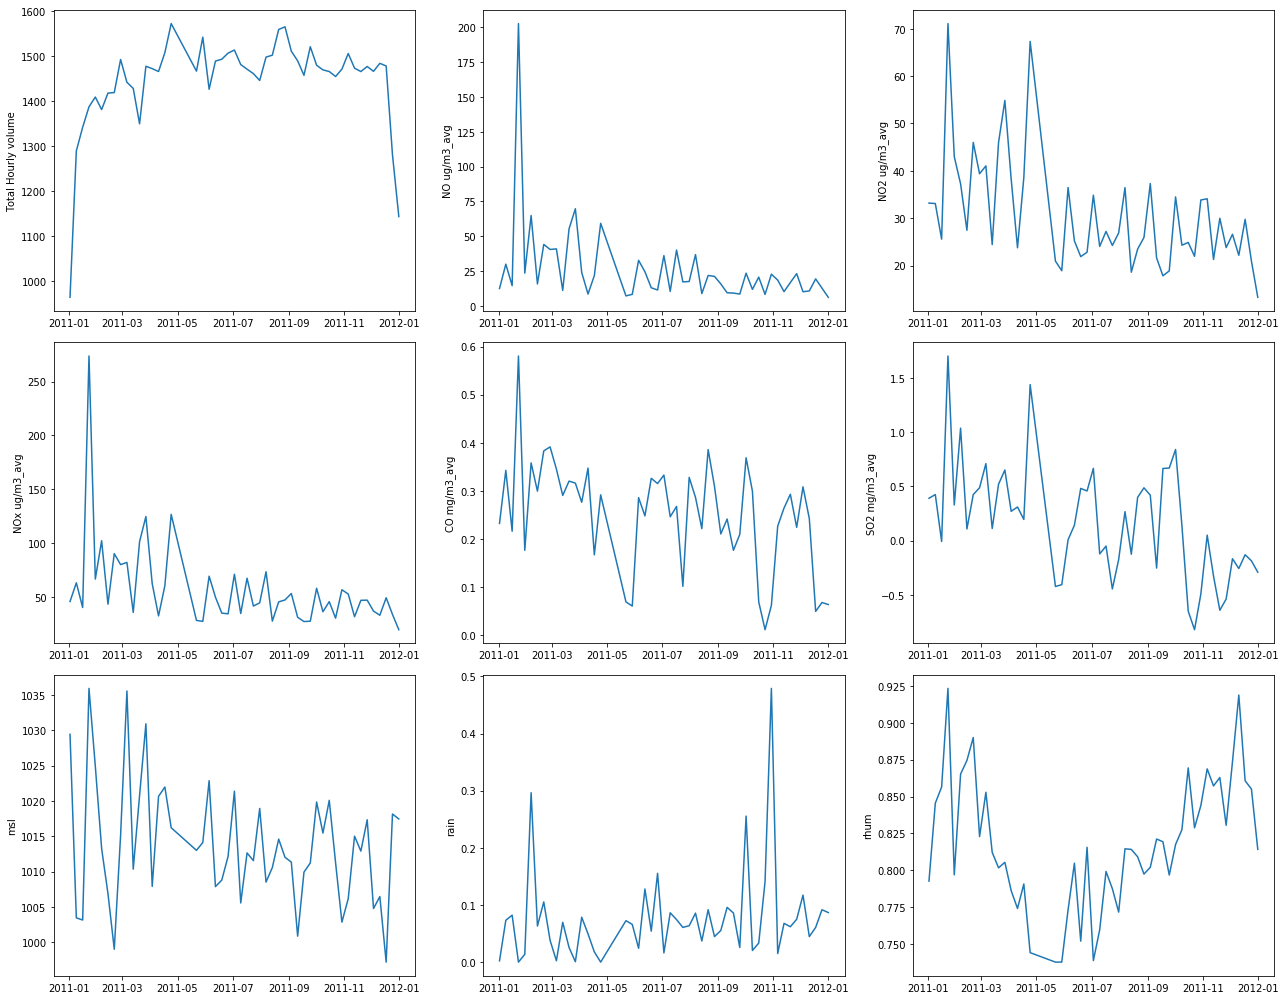

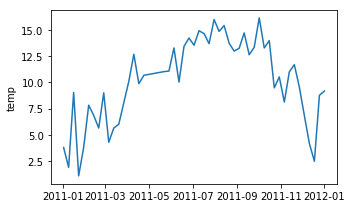

In [86]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(18,14),)

ax1.plot(weekly["Total Hourly volume"])
ax1.set_ylabel("Total Hourly volume")
ax2.plot(weekly["NO ug/m3_avg"])
ax2.set_ylabel("NO ug/m3_avg")
ax3.plot(weekly["NO2 ug/m3_avg"])
ax3.set_ylabel("NO2 ug/m3_avg")
ax4.plot(weekly["NOx ug/m3_avg"])
ax4.set_ylabel("NOx ug/m3_avg")
ax5.plot(weekly["CO mg/m3_avg"])
ax5.set_ylabel("CO mg/m3_avg")
ax6.plot(weekly["SO2 mg/m3_avg"])
ax6.set_ylabel("SO2 mg/m3_avg")

ax7.plot(weekly["msl"])
ax7.set_ylabel("msl")
ax8.plot(weekly["rain"])
ax8.set_ylabel("rain")
ax9.plot(weekly["rhum"])
ax9.set_ylabel("rhum")


plt.tight_layout()

plt.figure(figsize=(5,3))
plt.plot(weekly["temp"])
plt.ylabel("temp")
plt.tight_layout()



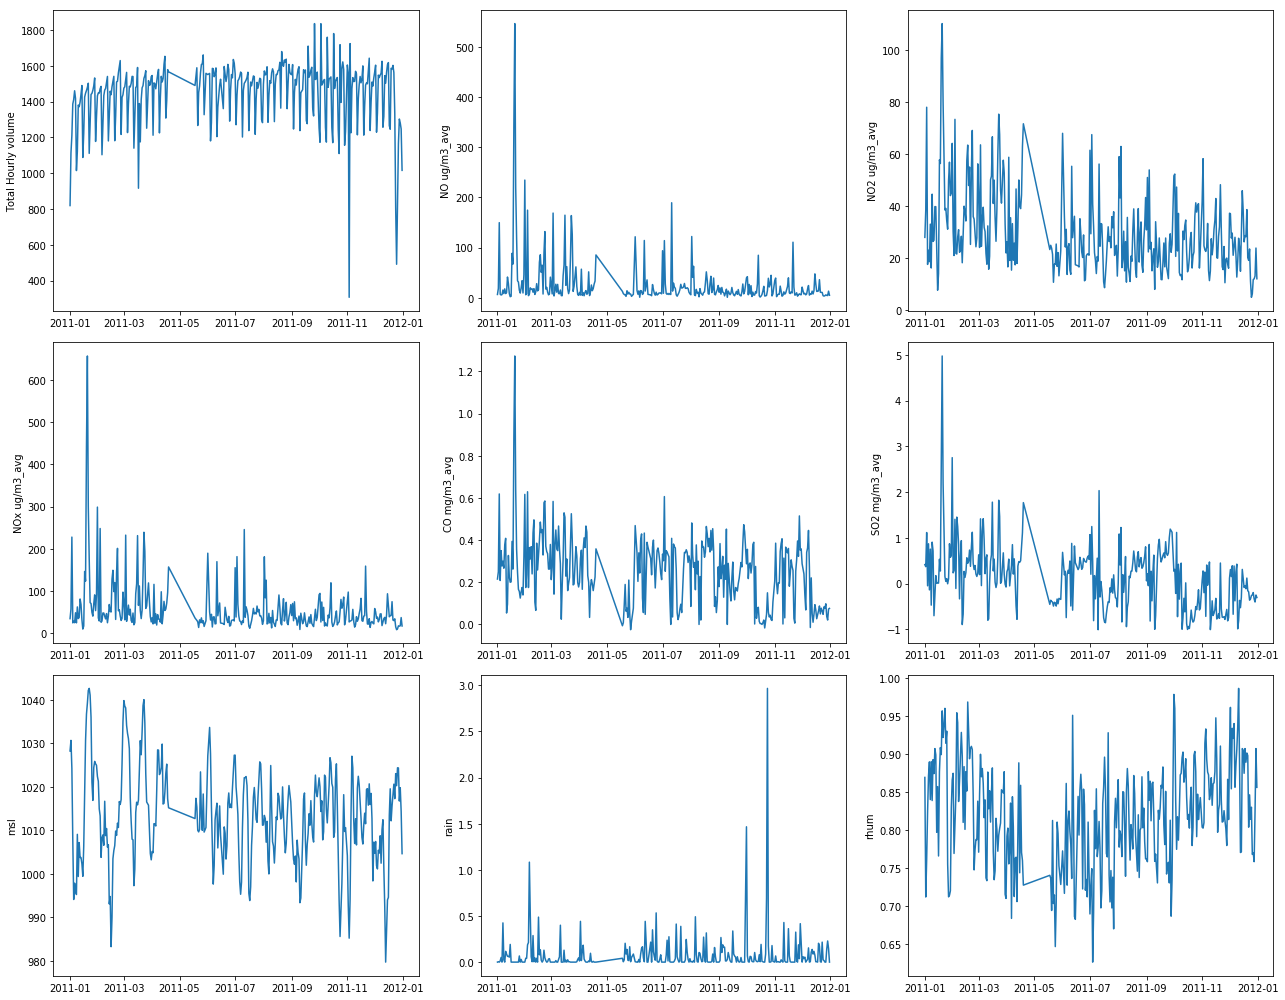

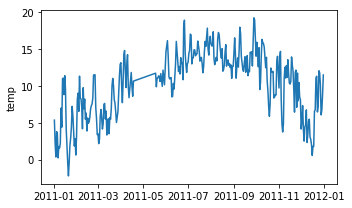

In [87]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(18,14),)

ax1.plot(daily["Total Hourly volume"])
ax1.set_ylabel("Total Hourly volume")
ax2.plot(daily["NO ug/m3_avg"])
ax2.set_ylabel("NO ug/m3_avg")
ax3.plot(daily["NO2 ug/m3_avg"])
ax3.set_ylabel("NO2 ug/m3_avg")
ax4.plot(daily["NOx ug/m3_avg"])
ax4.set_ylabel("NOx ug/m3_avg")
ax5.plot(daily["CO mg/m3_avg"])
ax5.set_ylabel("CO mg/m3_avg")
ax6.plot(daily["SO2 mg/m3_avg"])
ax6.set_ylabel("SO2 mg/m3_avg")

ax7.plot(daily["msl"])
ax7.set_ylabel("msl")
ax8.plot(daily["rain"])
ax8.set_ylabel("rain")
ax9.plot(daily["rhum"])
ax9.set_ylabel("rhum")


plt.tight_layout()

plt.figure(figsize=(5,3))
plt.plot(daily["temp"])
plt.ylabel("temp")
plt.tight_layout()



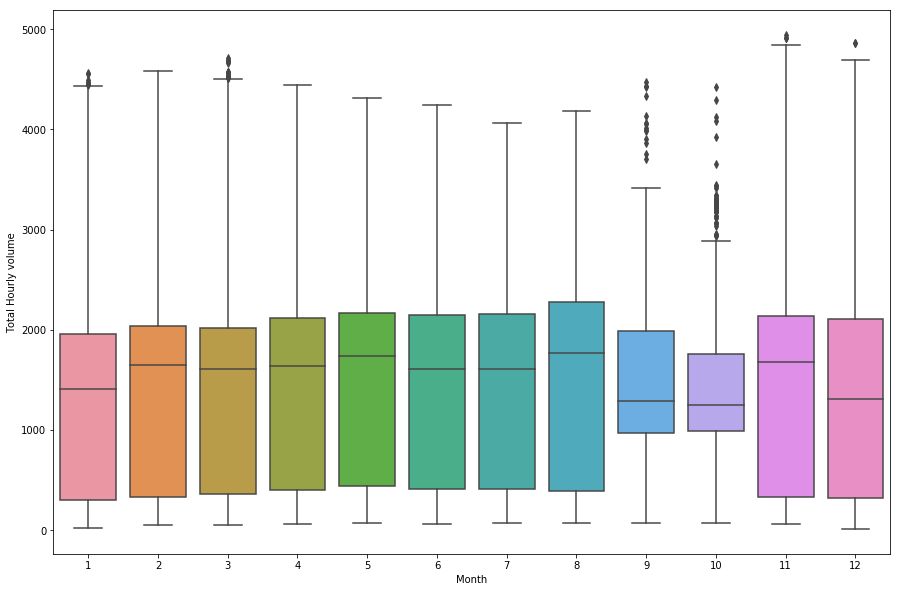

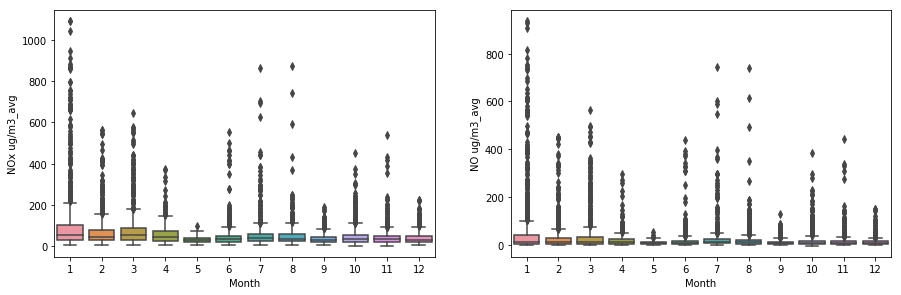

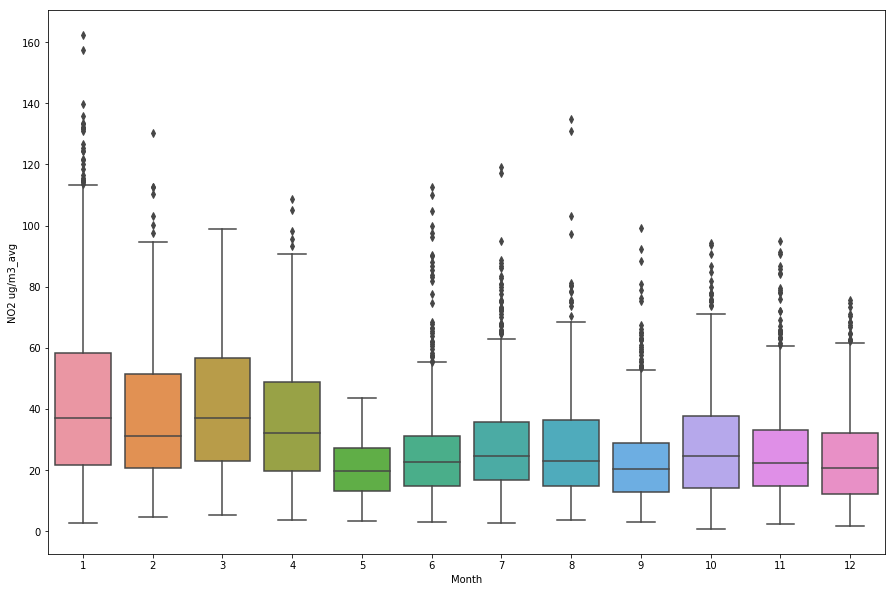

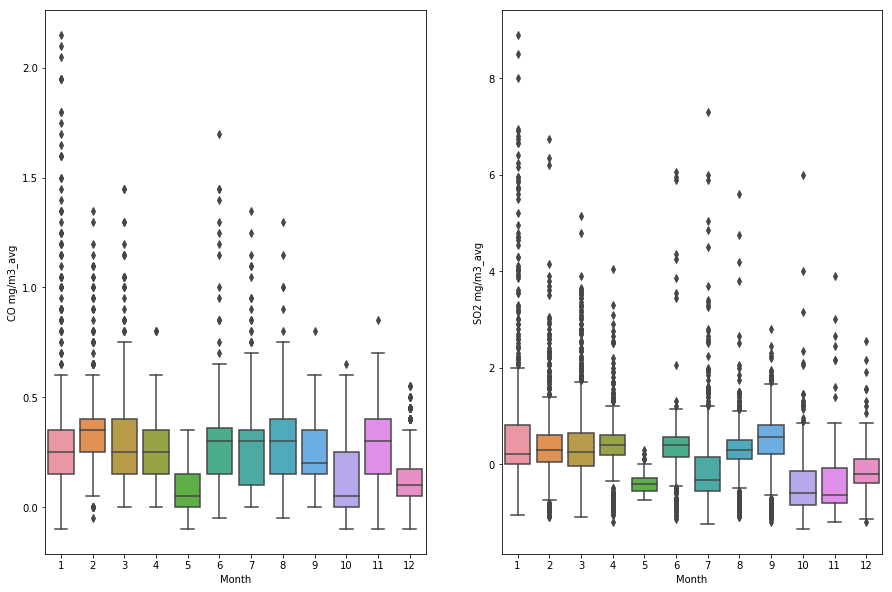

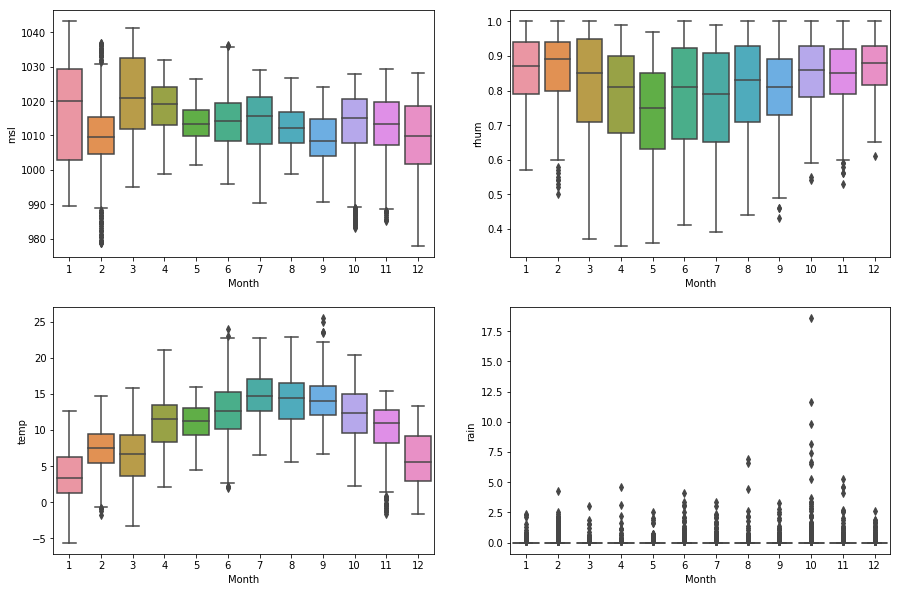

In [114]:
fig1=plt.figure(figsize=(15,10))
sns.boxplot(x="Month",y="Total Hourly volume", data=df2_indexed)
fig2=plt.figure(figsize=(15,10))
fig2.add_subplot(2,2,1)
sns.boxplot(x="Month",y="NOx ug/m3_avg", data=df2_indexed)
plt.subplot(222)
sns.boxplot(x="Month",y="NO ug/m3_avg", data=df2_indexed)
fig3=plt.figure(figsize=(15,10))
sns.boxplot(x="Month",y="NO2 ug/m3_avg", data=df2_indexed)
fig4=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(x="Month",y="CO mg/m3_avg", data=df2_indexed)
plt.subplot(122)
sns.boxplot(x="Month",y="SO2 mg/m3_avg", data=df2_indexed)

fig5=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x="Month",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Month",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Month",y="temp", data=df2_indexed)

fig5.add_subplot(224)
sns.boxplot(x="Month",y="rain", data=df2_indexed)




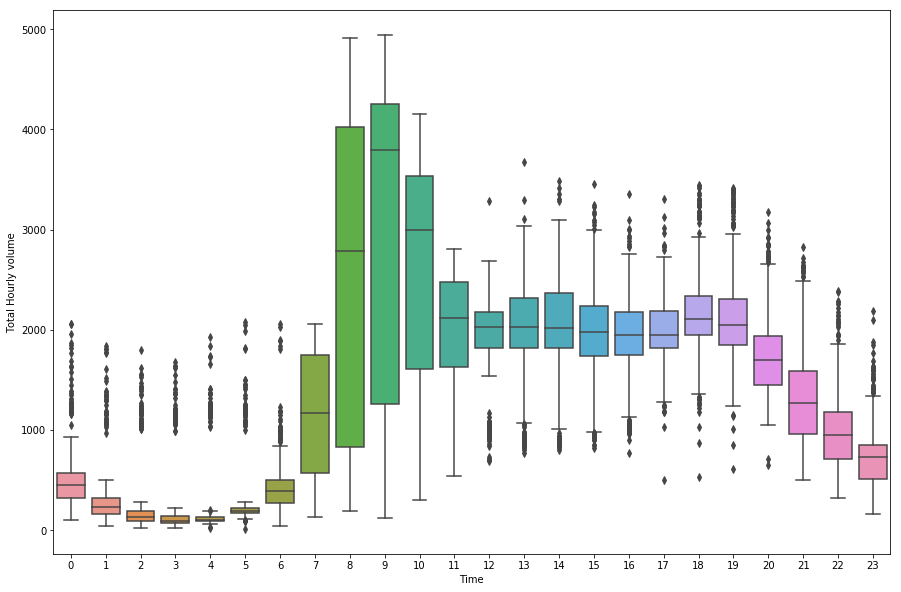

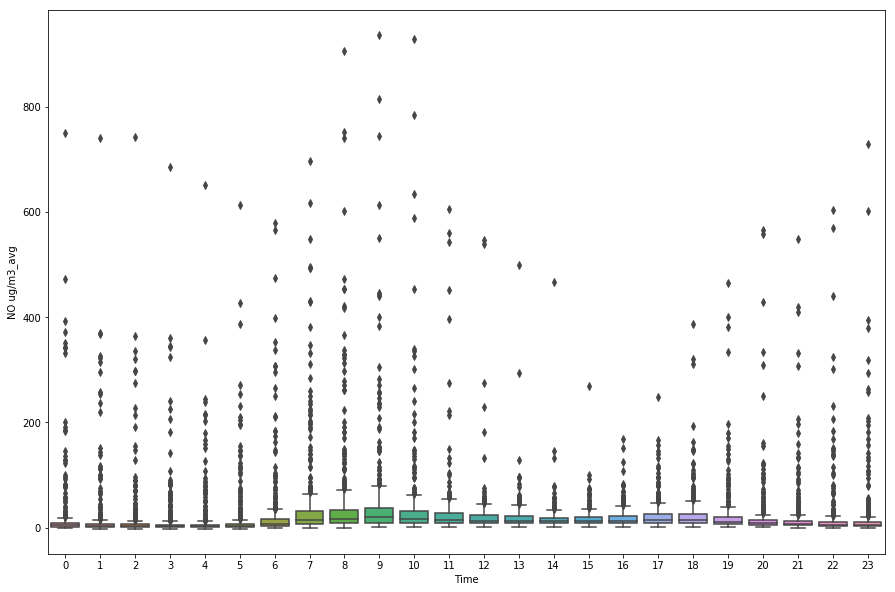

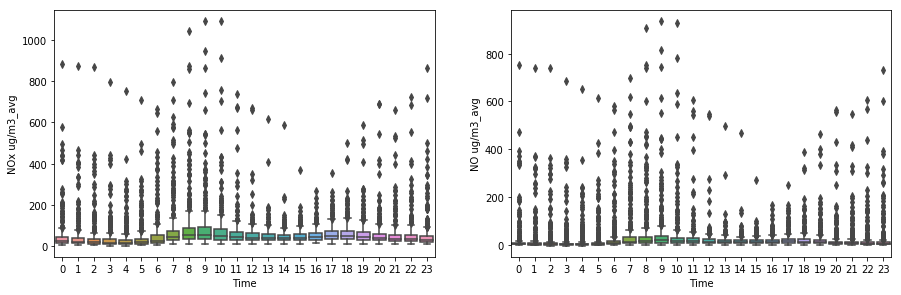

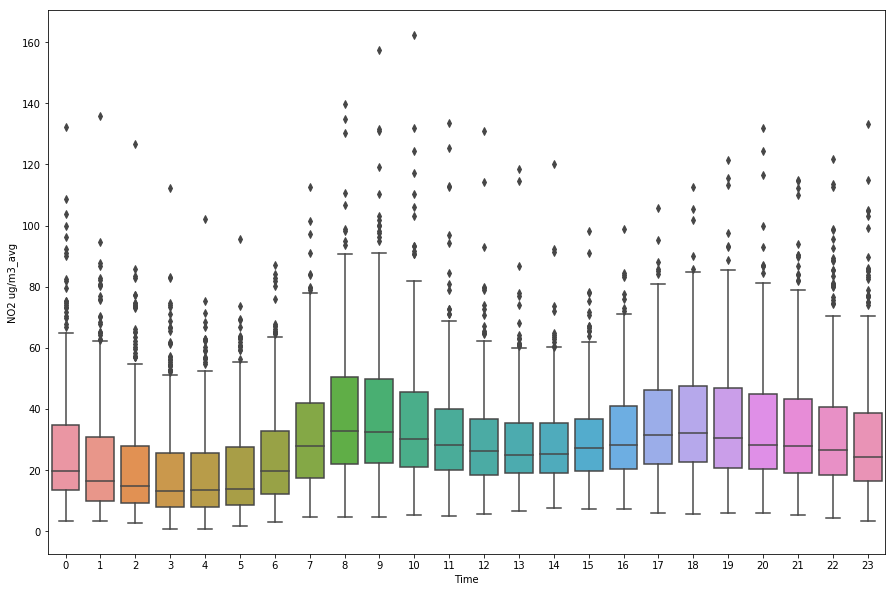

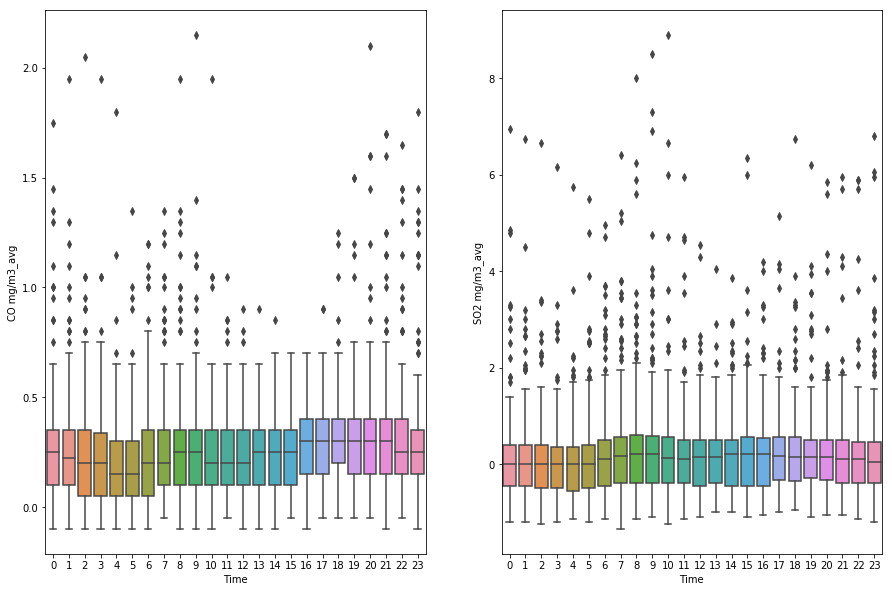

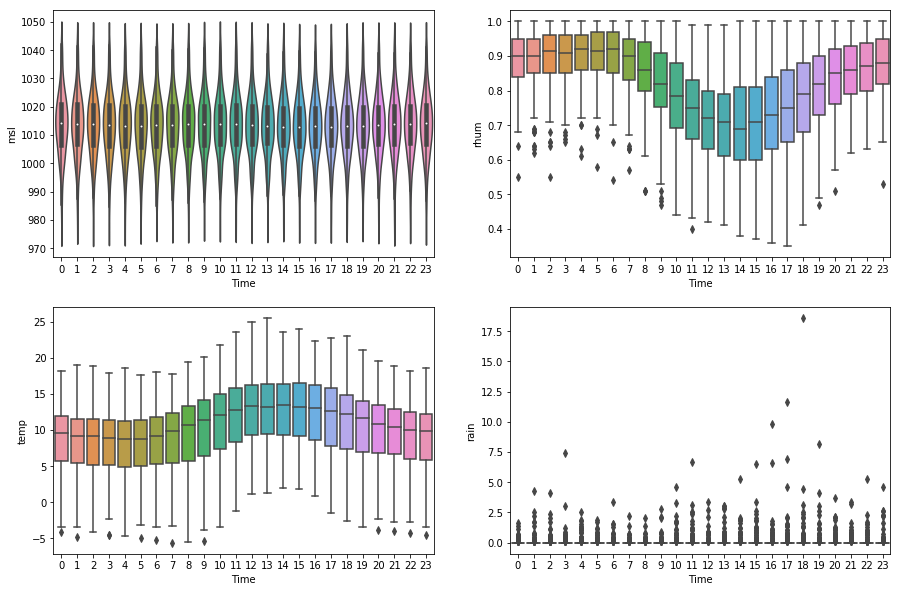

In [89]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Time",y="Total Hourly volume", data=df2_indexed)
fig7=plt.figure(figsize=(15,10))
sns.boxplot(x="Time",y="NO ug/m3_avg", data=df2_indexed)
fig8=plt.figure(figsize=(15,10))
fig8.add_subplot(2,2,1)
sns.boxplot(x="Time",y="NOx ug/m3_avg", data=df2_indexed)
plt.subplot(222)
sns.boxplot(x="Time",y="NO ug/m3_avg", data=df2_indexed)
fig9=plt.figure(figsize=(15,10))
sns.boxplot(x="Time",y="NO2 ug/m3_avg", data=df2_indexed)
fig10=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.boxplot(x="Time",y="CO mg/m3_avg", data=df2_indexed)
plt.subplot(122)
sns.boxplot(x="Time",y="SO2 mg/m3_avg", data=df2_indexed)

fig11=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.violinplot(x="Time",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Time",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Time",y="temp", data=df2_indexed)
plt.subplot(224)
sns.boxplot(x="Time",y="rain", data=df2_indexed)

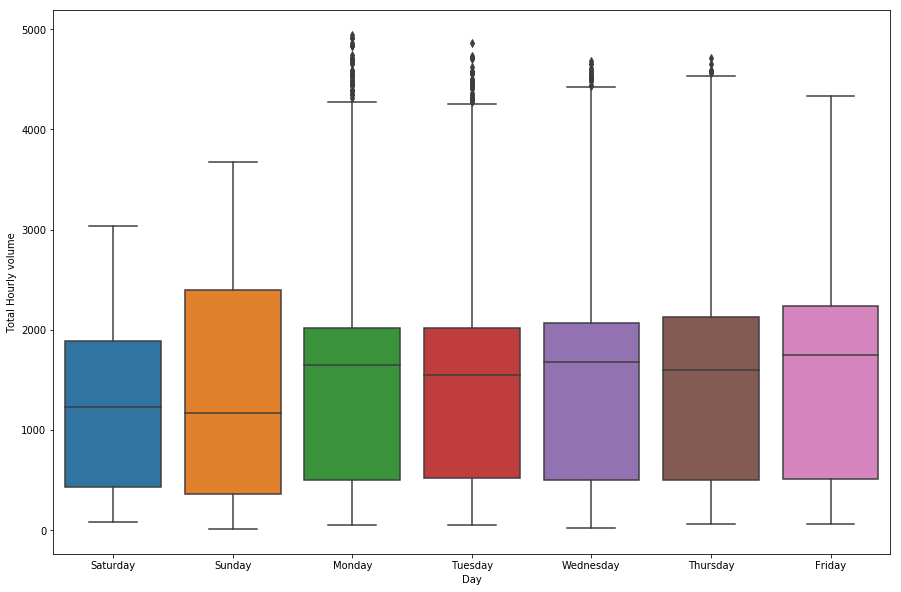

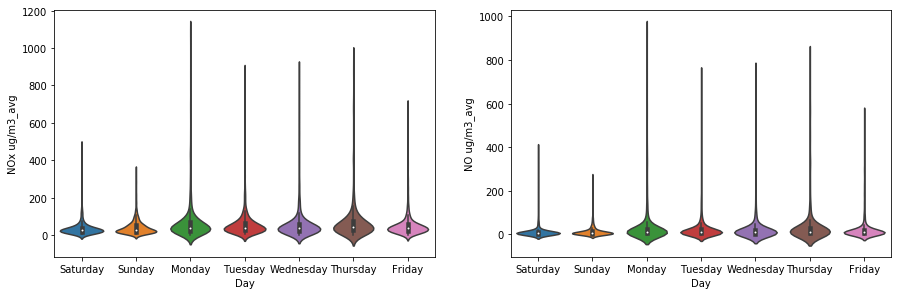

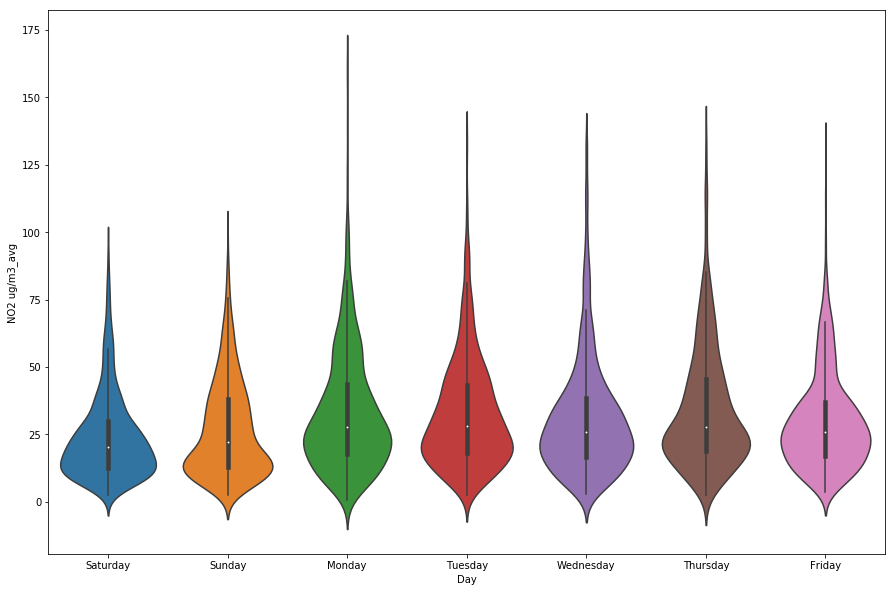

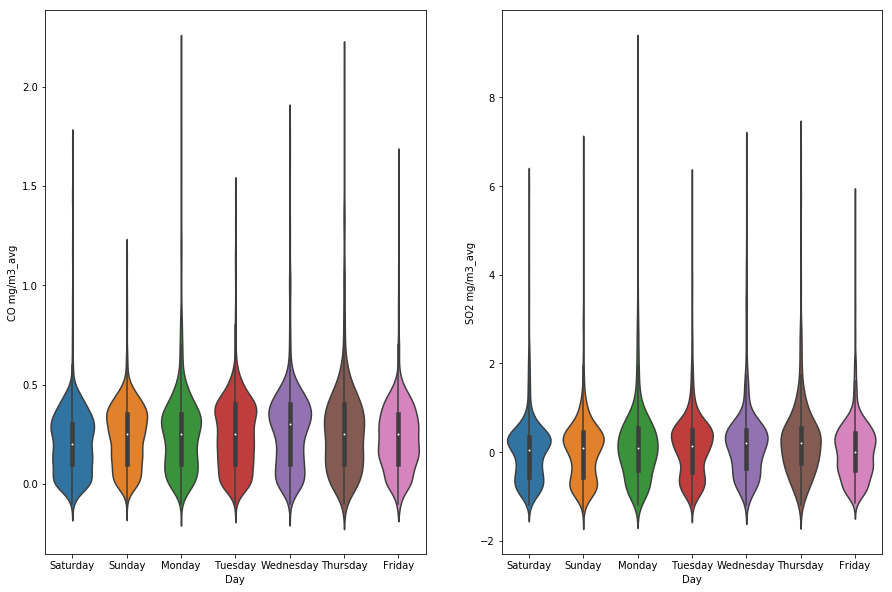

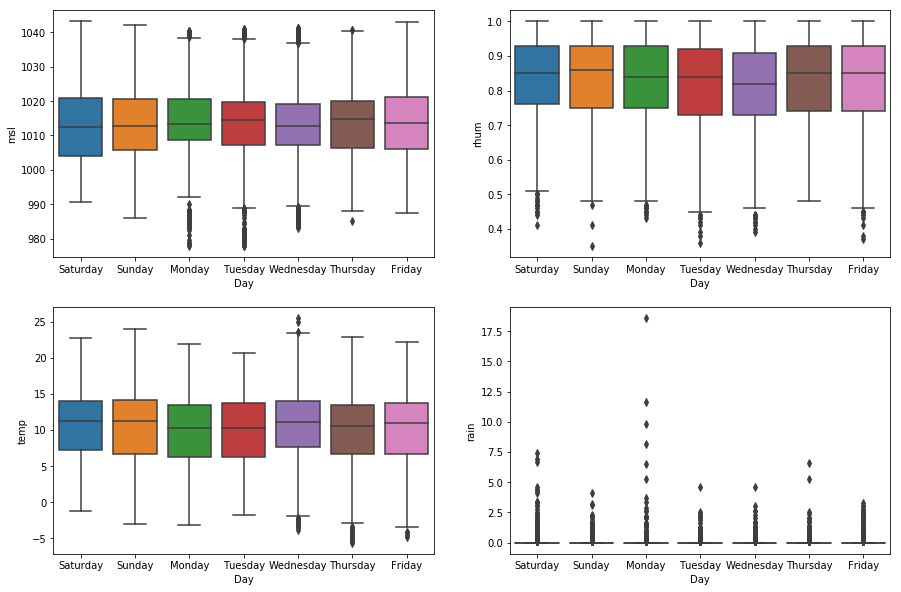

In [92]:
fig13=plt.figure(figsize=(15,10))
sns.boxplot(x="Day",y="Total Hourly volume", data=df2_indexed)
fig14=plt.figure(figsize=(15,10))
fig14.add_subplot(2,2,1)
sns.violinplot(x="Day",y="NOx ug/m3_avg", data=df2_indexed,scale="count")
plt.subplot(222)
sns.violinplot(x="Day",y="NO ug/m3_avg", data=df2_indexed,scale="count")
fig15=plt.figure(figsize=(15,10))
sns.violinplot(x="Day",y="NO2 ug/m3_avg", data=df2_indexed,scale="count")
fig16=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.violinplot(x="Day",y="CO mg/m3_avg", data=df2_indexed,scale="count")
plt.subplot(122)
sns.violinplot(x="Day",y="SO2 mg/m3_avg", data=df2_indexed,scale="count")
fig17=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x="Day",y="msl", data=df2_indexed)

plt.subplot(222)
sns.boxplot(x="Day",y="rhum", data=df2_indexed)
plt.subplot(223)
sns.boxplot(x="Day",y="temp", data=df2_indexed)

plt.subplot(224)
sns.boxplot(x="Day",y="rain", data=df2_indexed)





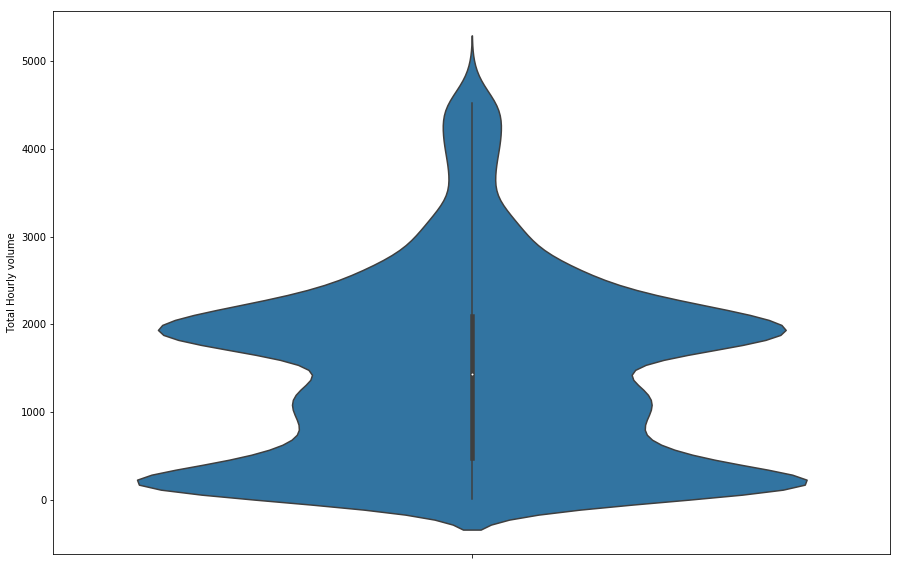

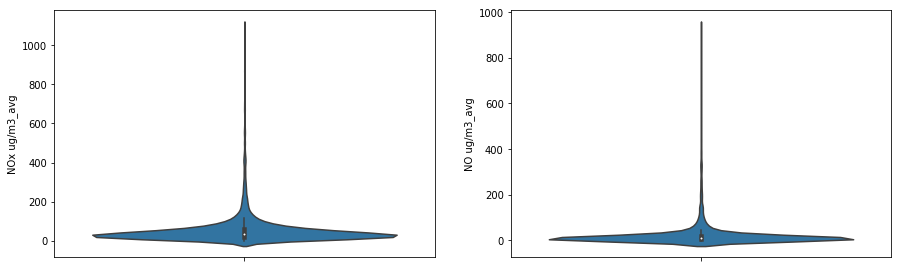

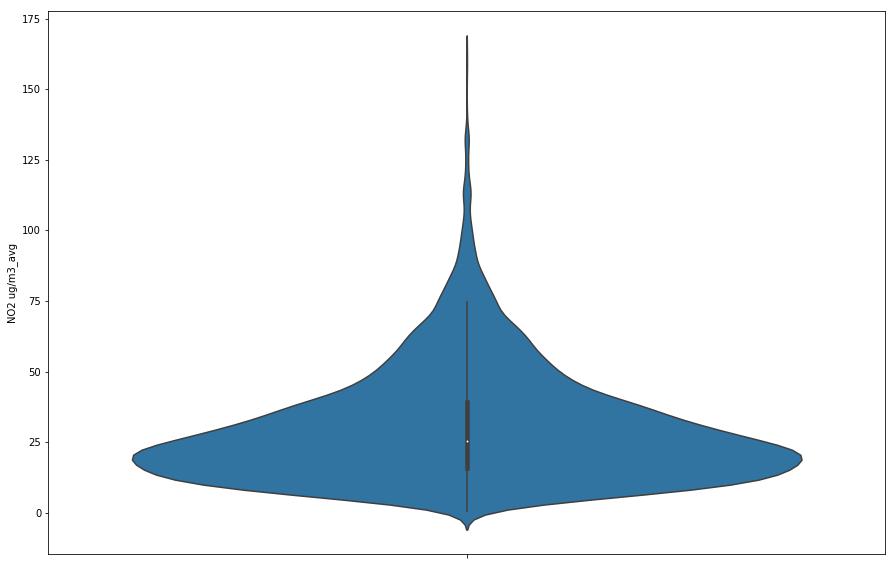

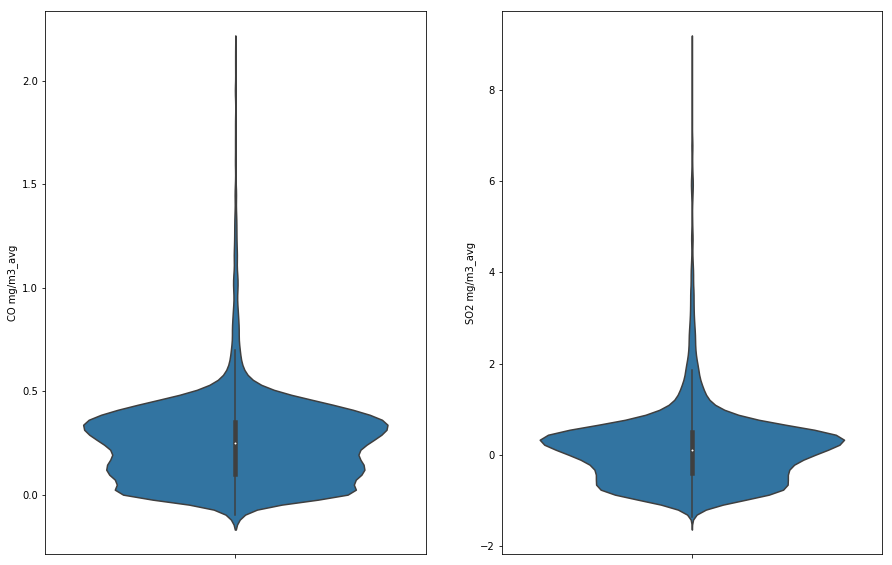

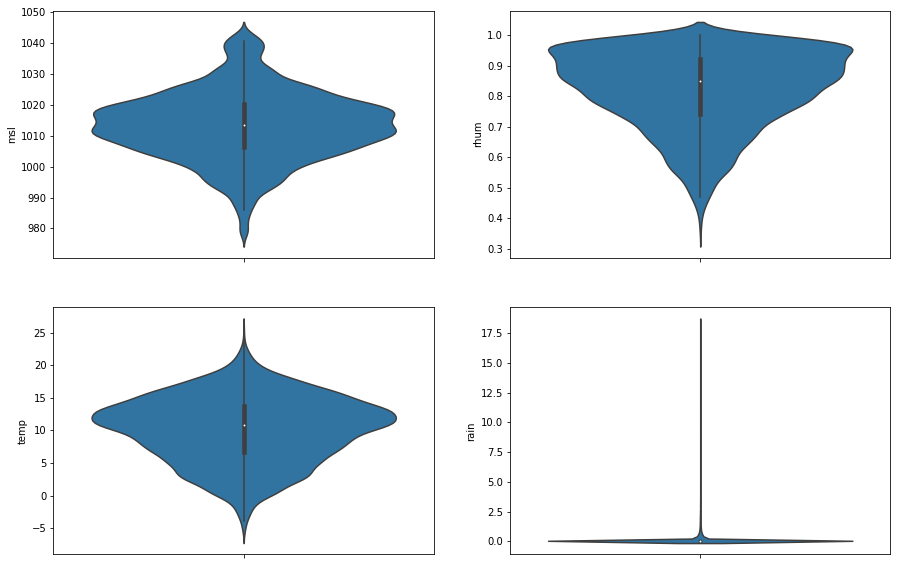

In [116]:
fig19=plt.figure(figsize=(15,10))
sns.violinplot(y="Total Hourly volume", data=df2_indexed,scale="count")
fig20=plt.figure(figsize=(15,10))
fig20.add_subplot(2,2,1)
sns.violinplot(y="NOx ug/m3_avg", data=df2_indexed,scale="count")
plt.subplot(222)
sns.violinplot(y="NO ug/m3_avg", data=df2_indexed,scale="count")
fig21=plt.figure(figsize=(15,10))
sns.violinplot(y="NO2 ug/m3_avg", data=df2_indexed,scale="count")
fig22=plt.figure(figsize=(15,10))
plt.subplot(121)
sns.violinplot(y="CO mg/m3_avg", data=df2_indexed,scale="count")
plt.subplot(122)
sns.violinplot(y="SO2 mg/m3_avg", data=df2_indexed,scale="count")
fig23=plt.figure(figsize=(15,10))

plt.subplot(221)
sns.violinplot(y="msl", data=df2_indexed,scale="count")

plt.subplot(222)
sns.violinplot(y="rhum", data=df2_indexed,scale="count")
plt.subplot(223)
sns.violinplot(y="temp", data=df2_indexed,scale="count")
plt.subplot(224)
sns.violinplot(y="rain", data=df2_indexed,scale="count")

In [120]:
df22=df2_indexed.drop(df2_indexed.columns[[0,1,2,3,4,5,9]],axis=1)

In [121]:
correlations=df22.corr()

In [125]:
correlations

,Hourly volume Westbound,Hourly volume Eastbound,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Hourly volume Westbound,1.000000,0.640187,0.570536,-0.008730,0.149136,0.029409,0.077860,0.023928,0.001806,0.011579,-0.353818,0.223198
Hourly volume Eastbound,0.640187,1.000000,0.935966,0.081253,0.208307,0.117211,0.075765,0.077146,-0.000079,0.005505,-0.313446,0.193396
Total Hourly volume,0.570536,0.935966,1.000000,0.098866,0.239904,0.139300,0.076712,0.088776,-0.000531,0.011338,-0.362451,0.221179
NO ug/m3_avg,-0.008730,0.081253,0.098866,1.000000,0.691673,0.984253,0.632615,0.690424,0.238951,-0.021380,0.128647,-0.246633
NO2 ug/m3_avg,0.149136,0.208307,0.239904,0.691673,1.000000,0.808441,0.545088,0.557521,0.258595,-0.002760,0.039587,-0.248733
NOx ug/m3_avg,0.029409,0.117211,0.139300,0.984253,0.808441,1.000000,0.648983,0.699132,0.258033,-0.018087,0.114510,-0.261850
CO mg/m3_avg,0.077860,0.075765,0.076712,0.632615,0.545088,0.648983,1.000000,0.638587,0.131790,0.002606,0.055941,-0.065376
SO2 mg/m3_avg,0.023928,0.077146,0.088776,0.690424,0.557521,0.699132,0.638587,1.000000,0.247906,-0.035066,0.000700,-0.146944
msl,0.001806,-0.000079,-0.000531,0.238951,0.258595,0.258033,0.131790,0.247906,1.000000,-0.150572,-0.083588,-0.115062
rain,0.011579,0.005505,0.011338,-0.021380,-0.002760,-0.018087,0.002606,-0.035066,-0.150572,1.000000,0.150364,0.012010


In [126]:
mask=(correlations<-0.1) & (correlations>-0.1) 


correlations[(correlations>0.1)|(correlations<-0.1)]

,Hourly volume Westbound,Hourly volume Eastbound,Total Hourly volume,NO ug/m3_avg,NO2 ug/m3_avg,NOx ug/m3_avg,CO mg/m3_avg,SO2 mg/m3_avg,msl,rain,rhum,temp
Hourly volume Westbound,1.000000,0.640187,0.570536,NaN,0.149136,NaN,NaN,NaN,NaN,NaN,-0.353818,0.223198
Hourly volume Eastbound,0.640187,1.000000,0.935966,NaN,0.208307,0.117211,NaN,NaN,NaN,NaN,-0.313446,0.193396
Total Hourly volume,0.570536,0.935966,1.000000,NaN,0.239904,0.139300,NaN,NaN,NaN,NaN,-0.362451,0.221179
NO ug/m3_avg,NaN,NaN,NaN,1.000000,0.691673,0.984253,0.632615,0.690424,0.238951,NaN,0.128647,-0.246633
NO2 ug/m3_avg,0.149136,0.208307,0.239904,0.691673,1.000000,0.808441,0.545088,0.557521,0.258595,NaN,NaN,-0.248733
NOx ug/m3_avg,NaN,0.117211,0.139300,0.984253,0.808441,1.000000,0.648983,0.699132,0.258033,NaN,0.114510,-0.261850
CO mg/m3_avg,NaN,NaN,NaN,0.632615,0.545088,0.648983,1.000000,0.638587,0.131790,NaN,NaN,NaN
SO2 mg/m3_avg,NaN,NaN,NaN,0.690424,0.557521,0.699132,0.638587,1.000000,0.247906,NaN,NaN,-0.146944
msl,NaN,NaN,NaN,0.238951,0.258595,0.258033,0.131790,0.247906,1.000000,-0.150572,NaN,-0.115062
rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.150572,1.000000,0.150364,NaN


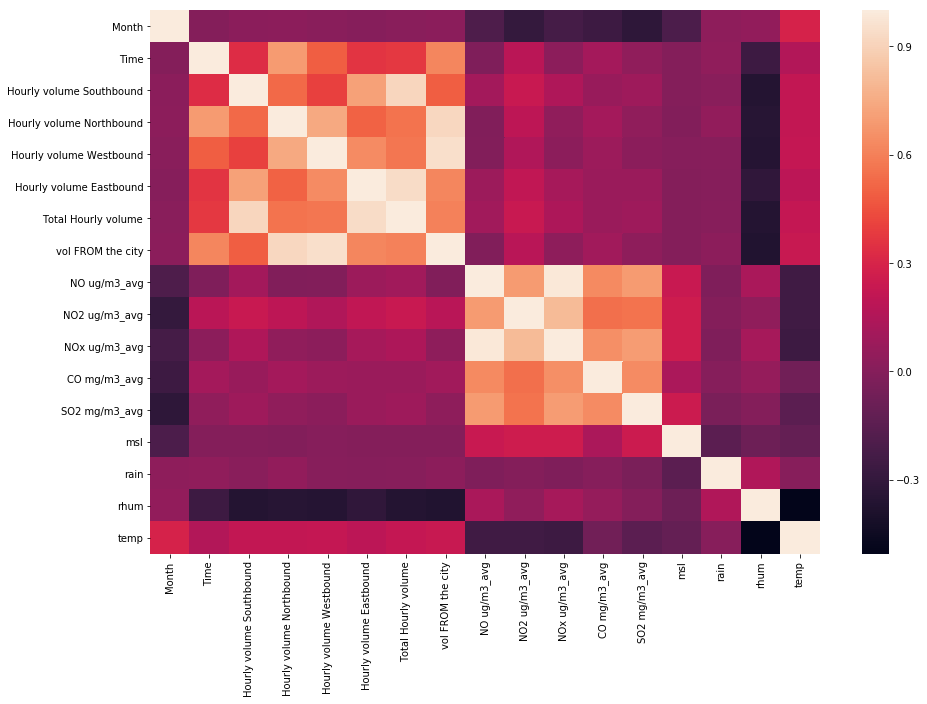

In [127]:
fig19=plt.figure(figsize=(15,10))
sns.heatmap(df2_indexed.corr())

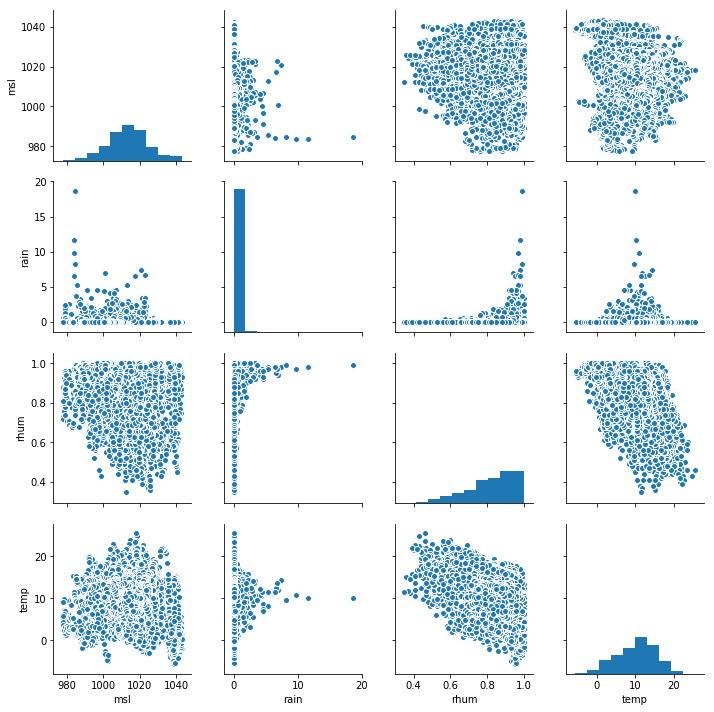

In [166]:
sns.pairplot(df2_indexed[["msl","rain","rhum","temp"]])

# **Prediction Model for NO**

In [116]:
x=df2_indexed[['Total Hourly volume', 'msl', 'rain', 'rhum', 'temp']]

In [117]:
df2_indexed["NO ug/m3_avg"]=df2_indexed["NO ug/m3_avg"].clip(lower=0)
y1=np.sqrt(df2_indexed['NO ug/m3_avg'])
y2=np.sqrt(df2_indexed['NO2 ug/m3_avg'])

In [118]:
y1.shape

(7816,)

## 1. Splitting the Data and train the Model

In [119]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y1, test_size=0.33, random_state=42)

In [120]:
model1=LinearRegression()

In [121]:
model1.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
print(model1.intercept_)

-72.683728144


In [123]:
model1.coef_

array([  9.50360144e-04,   7.34994854e-02,   3.31550830e-02,
         2.41360513e+00,  -1.26823142e-01])

In [124]:
cdf1=pd.DataFrame(model1.coef_,x.columns,columns=["Coeff"])

In [125]:
cdf1

,Coeff
Total Hourly volume,0.000950
msl,0.073499
rain,0.033155
rhum,2.413605
temp,-0.126823


## 2. Predictions

In [126]:
predictions1=model1.predict(X_test1)

In [127]:
predictions11=model1.predict(X_train1)

In [128]:
r2_score(y_train1,predictions11)

0.16634162007133868

(0, 30)

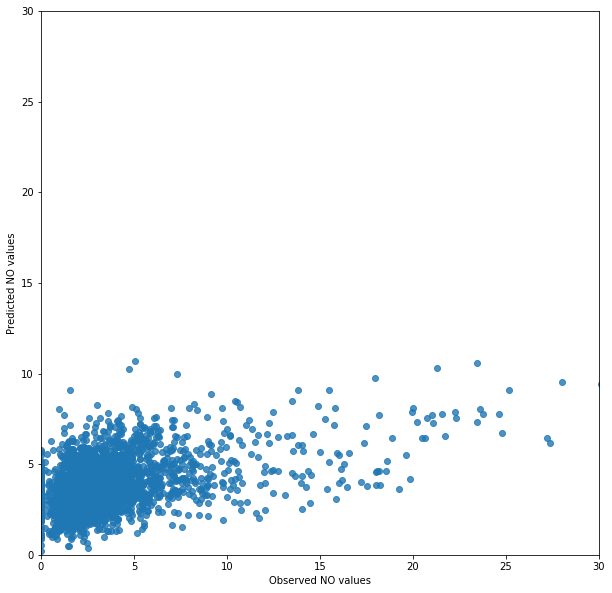

In [129]:
plt.figure(figsize=(10,10))
sns.regplot(y_test1,predictions1,fit_reg=False)
plt.xlabel('Observed NO values')
plt.ylabel('Predicted NO values')
plt.xlim(0, 30)
plt.ylim(0, 30)

In [130]:
r2_score(y_test1,predictions1)

0.1945932231148666

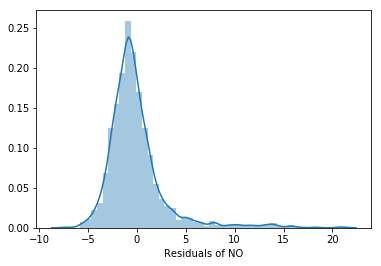

In [131]:
sns.distplot(y_test1-predictions1)
plt.xlabel("Residuals of NO")

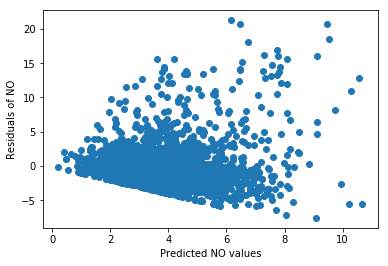

In [132]:
plt.scatter(predictions1,y_test1-predictions1)
plt.xlabel("Predicted NO values")
plt.ylabel("Residuals of NO")


In [133]:
metrics.mean_absolute_error(y_test1,predictions1)

1.9583895533366935

In [134]:
metrics.mean_squared_error(y_test1,predictions1)

9.172257483768977

In [135]:
 np.sqrt(metrics.mean_squared_error(y_test1,predictions1))

3.0285735064166723

# **Prediction Model for NO2**

## 1. Splitting the Data  and train the Model

In [136]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.33, random_state=42)

model2=LinearRegression()

model2.fit(X_train2,y_train2)

cdf2=pd.DataFrame(model2.coef_,x.columns,columns=["Coeff"])

In [137]:
print(model2.intercept_)


-29.1489096779


In [138]:
cdf2

,Coeff
Total Hourly volume,0.000563
msl,0.033998
rain,0.085088
rhum,0.067868
temp,-0.093017


## 2. Predictions

In [139]:
predictions2=model2.predict(X_test2)

(0, 13)

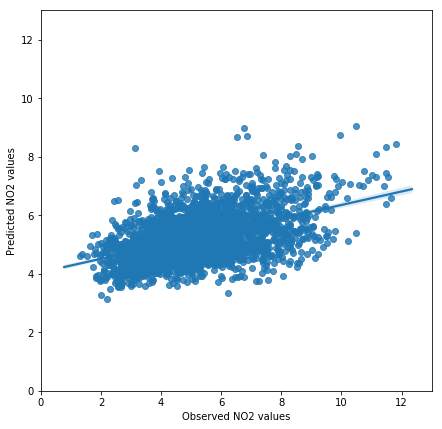

In [155]:
plt.figure(figsize=(7,7))
sns.regplot(y_test2,predictions2,fit_reg=True)
plt.xlabel('Observed NO2 values')
plt.ylabel('Predicted NO2 values')

plt.xlim(0, 13)
plt.ylim(0, 13)

In [141]:
r2_score(y_test2,predictions2)

0.22821886878620312

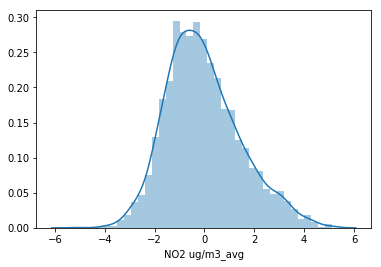

In [142]:
sns.distplot(y_test2-predictions2)

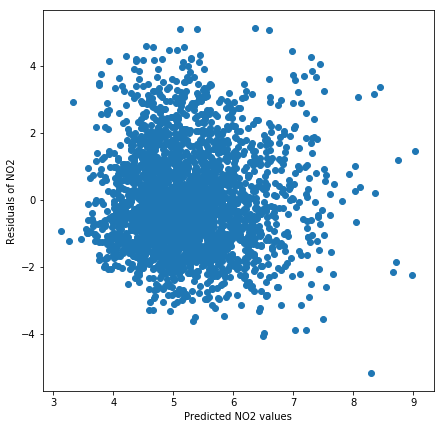

In [150]:
plt.figure(figsize=(7,7))

plt.scatter(predictions2,y_test2-predictions2)
plt.xlabel("Predicted NO2 values")
plt.ylabel("Residuals of NO2")


In [264]:
metrics.mean_absolute_error(y_test2,predictions2)


1.1897079016706178

In [265]:
metrics.mean_squared_error(y_test2,predictions2)

2.2429787891448645

In [266]:
 np.sqrt(metrics.mean_squared_error(y_test2,predictions2))

1.4976577676975686